# DA 320 
Assignment: Detecting Outliers

Student: Jennifer Roria

Source: Basis of code provided by Professor Spence - https://github.com/tspence/data-analysis-class-resources/blob/main/jupyter/Basics%20of%20Loading%20Data.ipynb

Date: October, 27 2023

In [21]:
#import libraries

import urllib3
import certifi

Retrieve Connection from a JSON File

In [22]:
import json

#Demonstration of how to load a file that contains secrets without accidentally leaking confidential info
with open('/Users/jennsmacbook/Downloads/secrets.json') as f:
    data = json.load(f)
    
secret_key = data['mongoDB']

#Print the length of the secret key. 
print(f"My secret key is {len(secret_key)} characters in length.")



My secret key is 100 characters in length.


Connect to a MongoDB Server from a Database

In [23]:
# I installed pypmongo and certifi through terminal
import pymongo
import certifi
import pandas as pd

# Connect to the database 
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())

# Fetch the database named "DA320"
da320_database = client['DA320']

# Within the database we have "collections". 
allCollections = da320_database.list_collection_names()

# Here is the list of collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")



Using MongoDB version 6.0.11.
This database has the collections ['METACRITIC ', 'IMBD']


Fetch IMDB Collection from a MongoDB Server

In [24]:
import re
#Fetching all movies from the year 2002
query = {'release_date' : re.compile(r'2002')}

# Retrieve all records from a collection - this can be a large amount of data!
cursor = da320_database["IMBD"].find(query)

# Convert this information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

# Make sure we've read the information correctly
imdb.head()


,_id,id,title,runtime,user_rating,votes,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company,mpaa_rating
0,652b81f8e5f87fac42d47bd2,116138,Drawing Flies,76.0,5.2,1425,2/26/2002,NaN,NaN,NaN,Comedy,"Jason Lee, Renée Humphrey, Jason Mewes, Carmen...","Matthew Gissing, Malcolm Ingram","Lisa N. Cohen, Mark Cohen, Matthew Gissing, Ma...","Aaron Gustafson, IndieDVD, Kelly McCarthy, Vie...",NaN
1,652b81f8e5f87fac42d48383,293832,Hansel & Gretel,89.0,4.4,1403,10/10/2002,NaN,100477.0,NaN,"Comedy, Family, Fantasy, Thriller","Taylor Momsen, Jacob Smith, Delta Burke, Howie...",Gary J. Tunnicliffe,"Steve Austin, Robin Bains, Jonathan Bogner, Da...","Broomstick Entertainment, Majestic Film Partne...",PG
2,652b81f8e5f87fac42d48420,298856,Evelyn,94.0,7.0,6708,9/9/2002,10000000.0,65344.0,NaN,Drama,"Sophie Vavasseur, Niall Beagan, Hugh McDonagh,...",Bruce Beresford,"Kevan Barker, Simon Bosanquet, Pierce Brosnan,...","First Look International, Cinerenta Medienbete...",PG
3,652b81f8e5f87fac42d48423,273435,Ararat,115.0,6.3,14493,5/20/2002,NaN,NaN,NaN,"Drama, War","Simon Abkarian, Charles Aznavour, Christopher ...",Atom Egoyan,"Sandra Cunningham, Atom Egoyan, Robert Lantos,...","Alliance Atlantis Communications, Serendipity ...",R
4,652b81f8e5f87fac42d4841e,330904,A Snake of June,77.0,6.8,4702,9/2/2002,NaN,NaN,NaN,"Drama, Horror, Mystery, Thriller","Asuka Kurosawa, Yûji Kôtari, Shin'ya Tsukamoto...",Shin'ya Tsukamoto,"Shin'ichi Kawahara, Keiko Kusakabe, Shin'ya Ts...",Kaijyu Theater,R


Converting Data

In [25]:
# Transform and standardize the columns
imdb.release_date=pd.to_datetime(imdb.release_date,errors = 'coerce')
imdb.budget = pd.to_numeric(imdb.budget, errors='coerce')
imdb.runtime=pd.to_numeric(imdb.runtime,errors='coerce')

# cheking result
imdb.head()


,_id,id,title,runtime,user_rating,votes,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company,mpaa_rating
0,652b81f8e5f87fac42d47bd2,116138,Drawing Flies,76.0,5.2,1425,2002-02-26,NaN,NaN,NaN,Comedy,"Jason Lee, Renée Humphrey, Jason Mewes, Carmen...","Matthew Gissing, Malcolm Ingram","Lisa N. Cohen, Mark Cohen, Matthew Gissing, Ma...","Aaron Gustafson, IndieDVD, Kelly McCarthy, Vie...",NaN
1,652b81f8e5f87fac42d48383,293832,Hansel & Gretel,89.0,4.4,1403,2002-10-10,NaN,100477.0,NaN,"Comedy, Family, Fantasy, Thriller","Taylor Momsen, Jacob Smith, Delta Burke, Howie...",Gary J. Tunnicliffe,"Steve Austin, Robin Bains, Jonathan Bogner, Da...","Broomstick Entertainment, Majestic Film Partne...",PG
2,652b81f8e5f87fac42d48420,298856,Evelyn,94.0,7.0,6708,2002-09-09,10000000.0,65344.0,NaN,Drama,"Sophie Vavasseur, Niall Beagan, Hugh McDonagh,...",Bruce Beresford,"Kevan Barker, Simon Bosanquet, Pierce Brosnan,...","First Look International, Cinerenta Medienbete...",PG
3,652b81f8e5f87fac42d48423,273435,Ararat,115.0,6.3,14493,2002-05-20,NaN,NaN,NaN,"Drama, War","Simon Abkarian, Charles Aznavour, Christopher ...",Atom Egoyan,"Sandra Cunningham, Atom Egoyan, Robert Lantos,...","Alliance Atlantis Communications, Serendipity ...",R
4,652b81f8e5f87fac42d4841e,330904,A Snake of June,77.0,6.8,4702,2002-09-02,NaN,NaN,NaN,"Drama, Horror, Mystery, Thriller","Asuka Kurosawa, Yûji Kôtari, Shin'ya Tsukamoto...",Shin'ya Tsukamoto,"Shin'ichi Kawahara, Keiko Kusakabe, Shin'ya Ts...",Kaijyu Theater,R


Plotting Currency Numbers 

In [26]:
from matplotlib import pyplot

def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

Plotting Runtime Against Release Date

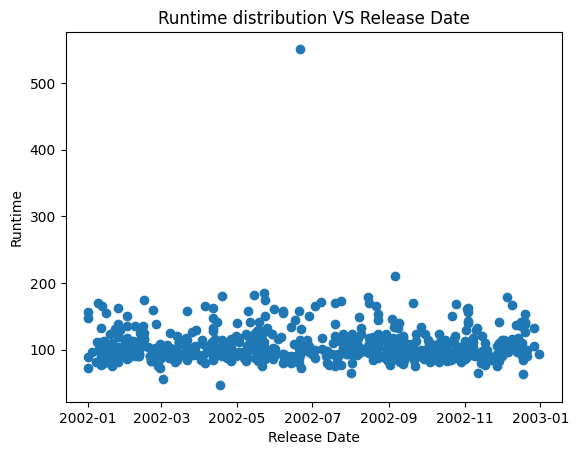

In [27]:
pyplot.title('Runtime distribution VS Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Runtime')
pyplot.scatter(imdb['release_date'], imdb['runtime'])
pyplot.show()

Top Outliers for Runtime

In [28]:
#Identify the top outliers for Runtime
imdb.sort_values("runtime", ascending = False).head()

,_id,id,title,runtime,user_rating,votes,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company,mpaa_rating
183,652b81f8e5f87fac42d487a1,389448,Tie Xi Qu: West of the Tracks,551.0,8.2,1163,2002-06-21,NaN,NaN,NaN,Documentary,", , , ,",Bing Wang,"Bing Wang, Zhu Zhu","Wang Bing Film Workshop, The Hubert Bals Fund ...",None
60,652b81f8e5f87fac42d48745,328998,Dil Hai Tumhara,210.0,5.4,1887,2002-09-06,NaN,NaN,NaN,"Drama, Romance","Rekha, Preity Zinta, Arjun Rampal, Mahima Chau...",Kundan Shah,"Kumar Sadhuram Taurani, Ramesh Sadhuram Tauran...",Tips Industries,None
48,652b81f8e5f87fac42d486c5,238936,Devdas,185.0,7.5,41781,2002-05-23,500000000.0,NaN,NaN,"Drama, Musical, Romance","Shah Rukh Khan, Aishwarya Rai Bachchan, Madhur...",Sanjay Leela Bhansali,"Gajendra Mishra, Mohan Nayyar, Bharat S. Shah","Red Chillies Entertainment, Mega Bollywood",Not Rated
148,652b81f8e5f87fac42d487d8,321781,Cremaster 3,182.0,6.9,1448,2002-05-15,NaN,9787.0,NaN,"Drama, Fantasy","Richard Serra, Matthew Barney, Aimee Mullins, ...",Matthew Barney,"Matthew Barney, Barbara Gladstone, Chelsea Rom...",Glacier Field LLC,Unrated
190,652b81f8e5f87fac42d48809,247911,Aap Mujhe Achche Lagne Lage,180.0,3.1,2548,2002-04-19,115000000.0,NaN,NaN,"Action, Drama, Romance","Hrithik Roshan, Ameesha Patel, Kiran Kumar, Mu...",Vikram Bhatt,"Gautam Kumar, Rohit Kumar, Anupam Sharma, Rohi...","Emkay Films, Loneranger Productions",Not Rated


Plotting Budget Against Release Date

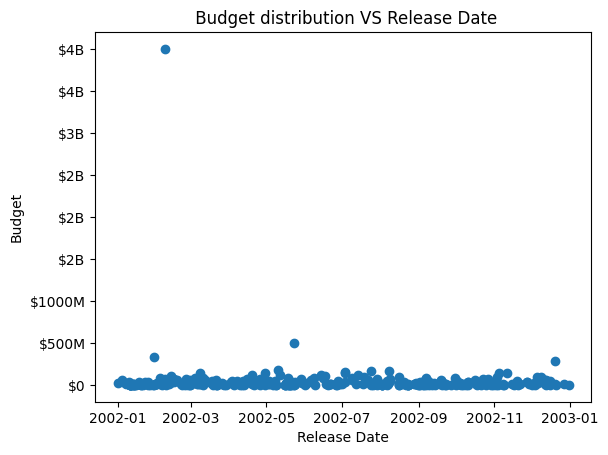

In [29]:
pyplot.title(' Budget distribution VS Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Budget')
pyplot.scatter(imdb['release_date'], imdb['budget'])
pyplot.gca().yaxis.set_major_formatter(format_currency)
pyplot.show()

Top outliers for budget

In [30]:
imdb.sort_values("budget", ascending = False).head()

,_id,id,title,runtime,user_rating,votes,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company,mpaa_rating
326,652b81f8e5f87fac42d48770,307920,What's Up with Cinta?,112.0,7.7,2809,2002-02-08,4.000000e+09,NaN,NaN,"Drama, Romance","Dian Sastrowardoyo, Nicholas Saputra, Ladya Ch...",Rudy Soedjarwo,"Mira Lesmana, Toto Prasetyanto, Riri Riza","Miles Films, Miles Productions",TV-14
48,652b81f8e5f87fac42d486c5,238936,Devdas,185.0,7.5,41781,2002-05-23,5.000000e+08,NaN,NaN,"Drama, Musical, Romance","Shah Rukh Khan, Aishwarya Rai Bachchan, Madhur...",Sanjay Leela Bhansali,"Gajendra Mishra, Mohan Nayyar, Bharat S. Shah","Red Chillies Entertainment, Mega Bollywood",Not Rated
280,652b81f8e5f87fac42d4867b,250223,Asterix & Obelix: Mission Cleopatra,107.0,6.6,52571,2002-01-30,3.270000e+08,NaN,111127553.0,"Adventure, Comedy, Family, Fantasy","Gérard Depardieu, Christian Clavier, Jamel Deb...",Alain Chabat,"Claude Berri, Alain Chabat, Sarim Fassi, Pierr...","Canal+, Centre national du cinéma et de l'imag...",PG
296,652b81f8e5f87fac42d4876f,294662,Kaante,154.0,6.6,5061,2002-12-20,2.800000e+08,NaN,8845861.0,"Action, Crime, Drama, Thriller","Amitabh Bachchan, Sanjay Dutt, Suniel Shetty, ...",Sanjay Gupta,"Hanif Chunawala, Anuradha Gupta, Sanjay Gupta,...","Film Club, Pritish Nandy Communications, White...",R
420,652b81f8e5f87fac42d487a6,248216,Na Tum Jaano Na Hum,158.0,4.9,2879,2002-05-10,1.800000e+08,NaN,NaN,"Comedy, Drama, Musical, Romance","Hrithik Roshan, Saif Ali Khan, Esha Deol, Alok...",Arjun Sablok,"Narsingh Rajput, Vivek Singhania",PFH Entertainment Ltd.,None


Outliers in Runtime:
Some outliers may represent movies that are actually episodes combined together, while others could be exceptionally long documentary films. To identify these outliers, consider adding a filter that checks for the presence of episodes and filters by movie type!


Outliers in Budget:
 It's possible that films with budgets higher than the highest verified USD amount were actually recorded in the currencies of their respective home nations. 
 To ensure proper budget comparison, consider adding a filter based on Currency Code. Create an additional field that allows for conversion to US dollars according to the release year, facilitating a more accurate budget analysis.
 In addition, this is optional to do, but I think cross-referencing the budget data with trustworthy sources or databases that specifically state the currency used for recording could be one approach to confirm this claim. It would be interesting to examine the validity of this assumption using other data sets.


Conclusion:
Adding these filters and conversions can provide more insight into outliers in runtime and budget, helping to identify whether the outliers are due to certain movie types or currency differences over time. 